<a href="https://colab.research.google.com/github/BasilaThasni/US_Market_CarPrice_Prediction_ML/blob/main/US_CarMarket_PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files #import file
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [2]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

#Preprocessing:

In [4]:
df  #show the dataframe

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.shape

(205, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##**No null values detected**

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
#check duplicate rows
df.duplicated().sum()

0

##**No duplicated rows**

In [11]:
objects = df.select_dtypes(include='object').columns.tolist() # make a list of columns with object data.
print(f"Column names of object data",objects)
print(f"Number of columns with object data is:",len(objects))

Column names of object data ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Number of columns with object data is: 10


In [12]:
for x in objects:
  print(f"{df[x].value_counts()}\n")

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

fueltype
gas       185
diesel     20
Name: count, dtype: int64

aspiration
std      168
turbo     37
Name: count, dtype: int64

doornumber
four    115
two      90
Name: count, dtype: int64

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

enginelocation
front    202
rear       3
Name: count, dtype: int64

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

cylindernumber
four      159
six        24
five       11
eight       5
two         

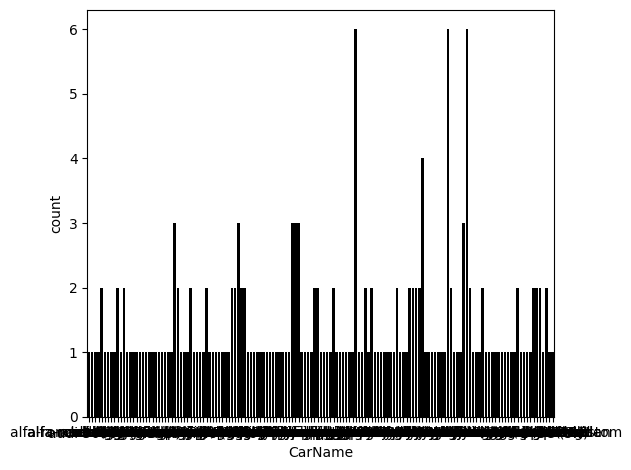

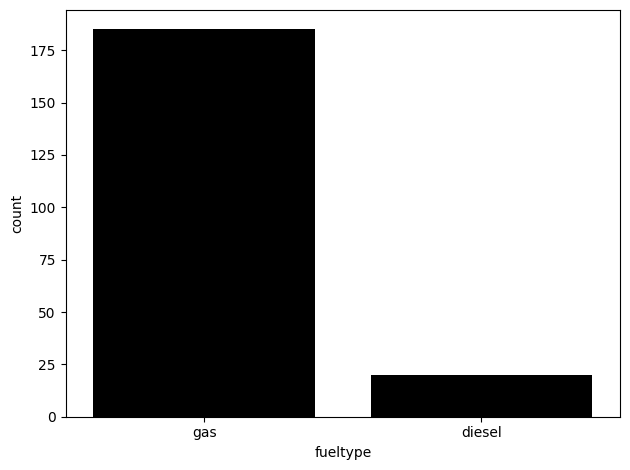

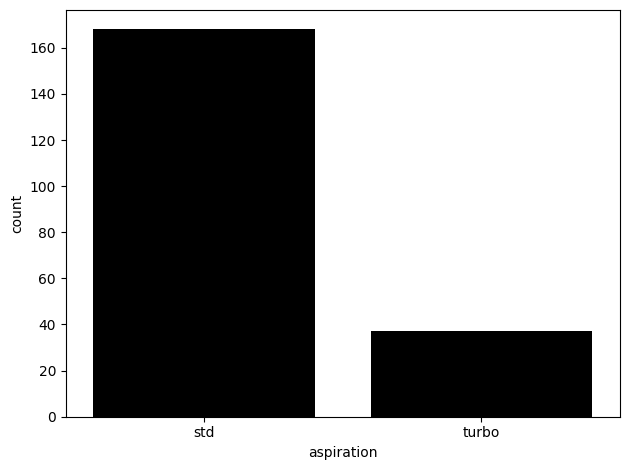

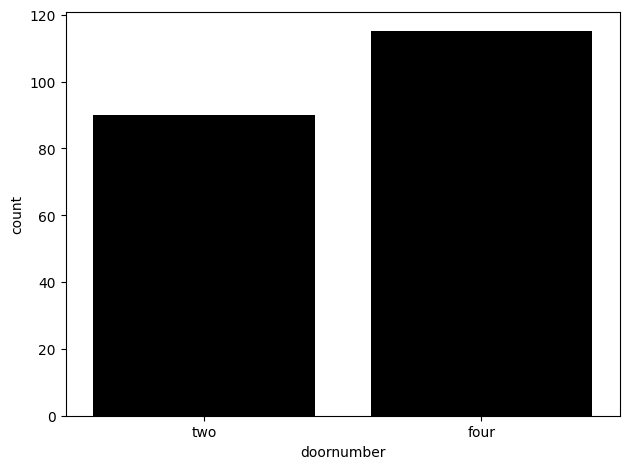

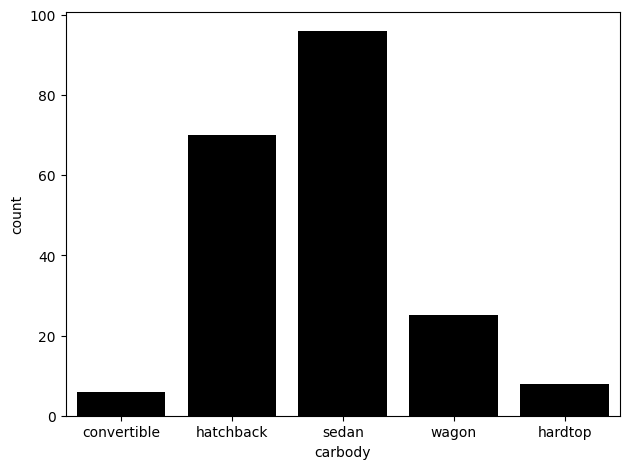

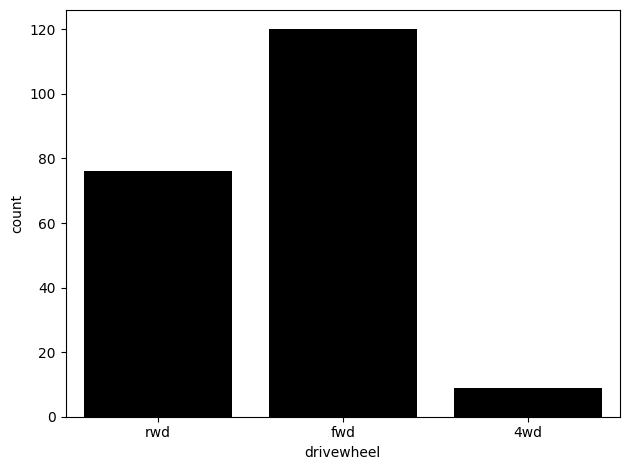

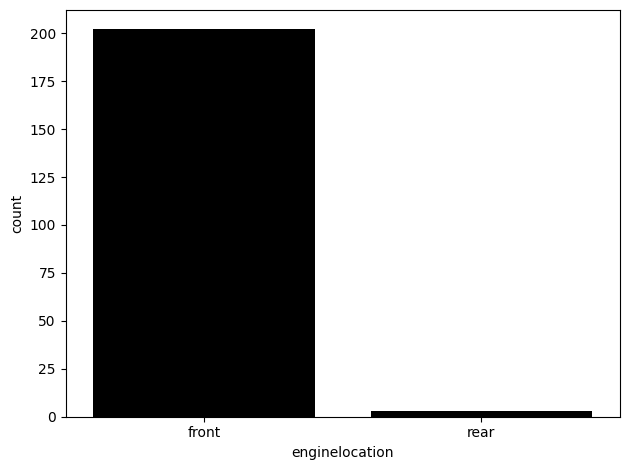

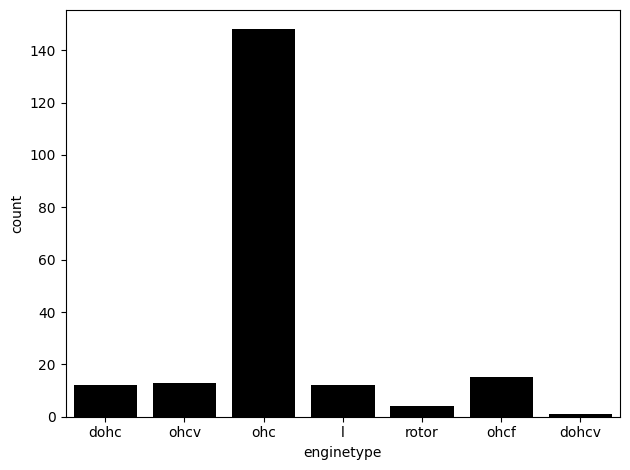

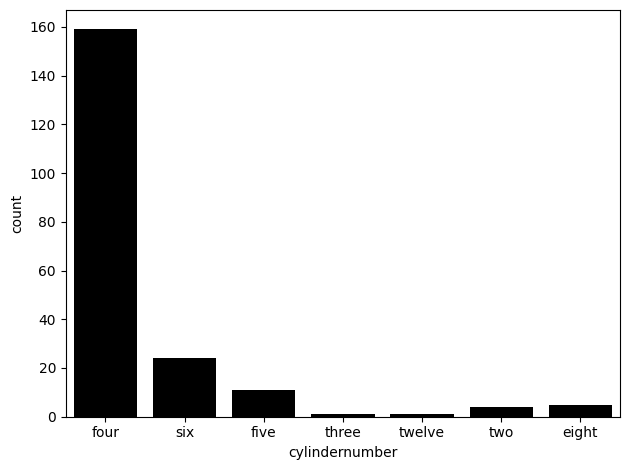

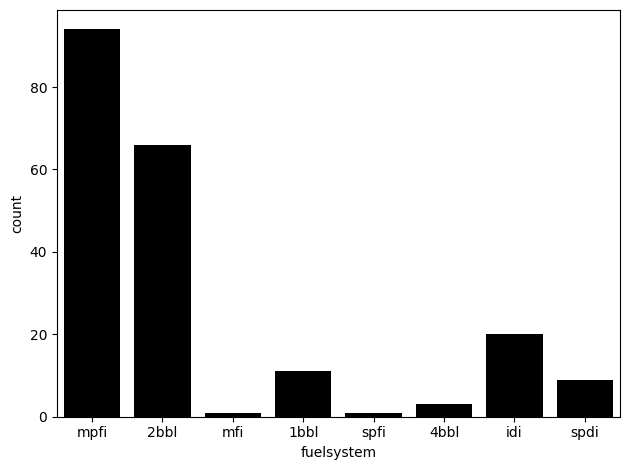

In [13]:
for column in objects: #draw countplot to see the relation between number of cars with the object columns:
  sns.countplot(x=column,data=df,color='black')
  plt.tight_layout()
  plt.show()

In [14]:
numbers = df.select_dtypes(include='number').columns.tolist() # make a list of columns with number data.
print(f"Column names of number data",numbers)
print(f"Number of columns with number data is:",len(numbers))


Column names of number data ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Number of columns with number data is: 16


#Outlier detection:

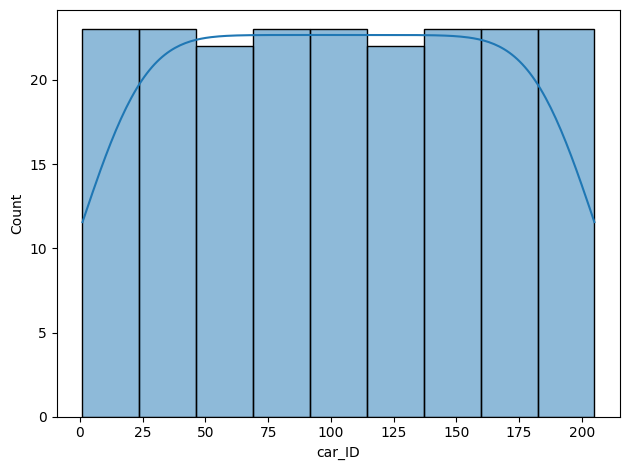

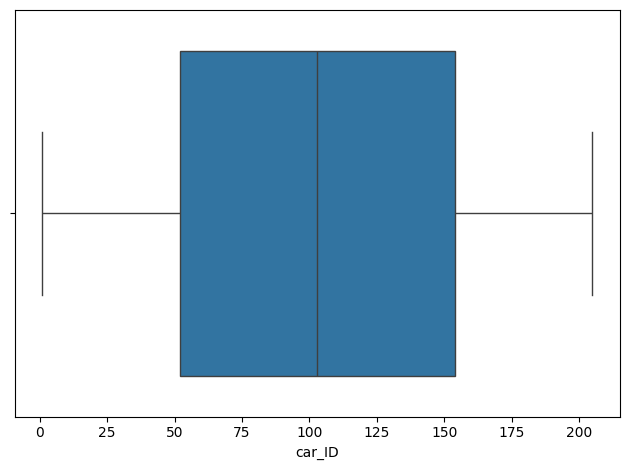

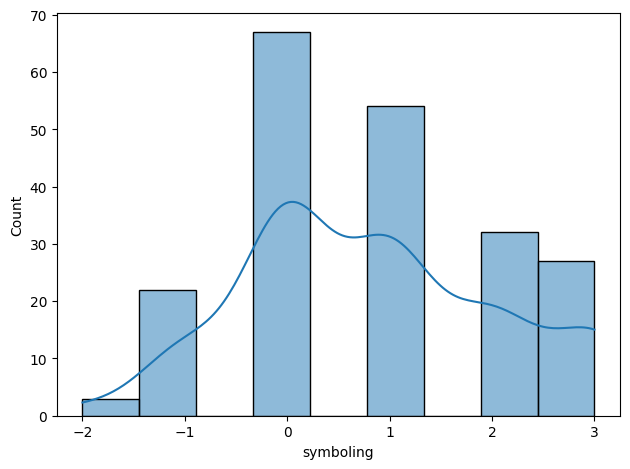

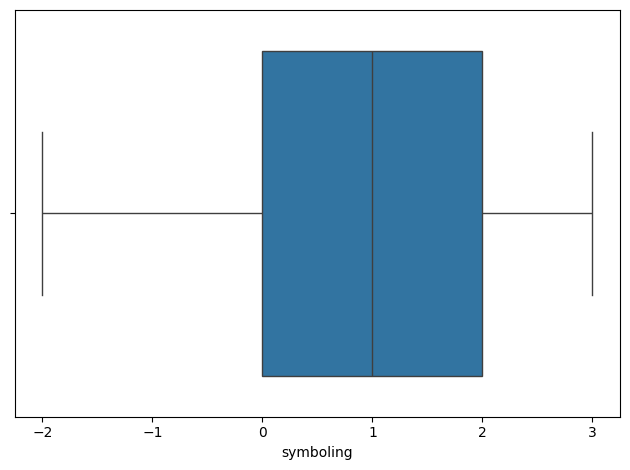

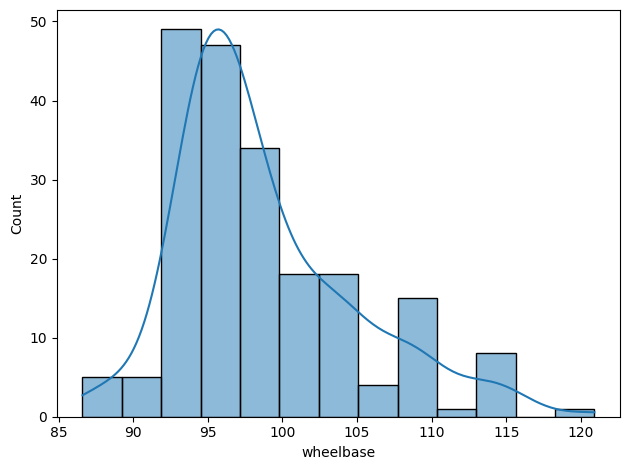

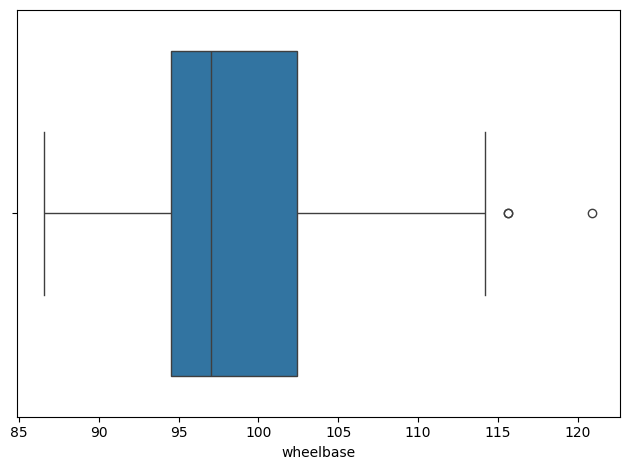

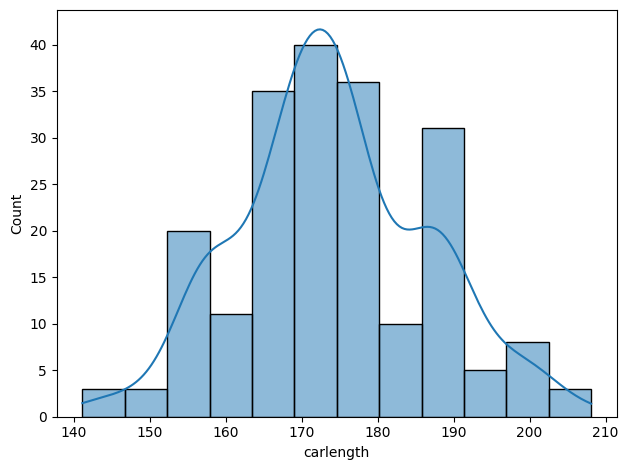

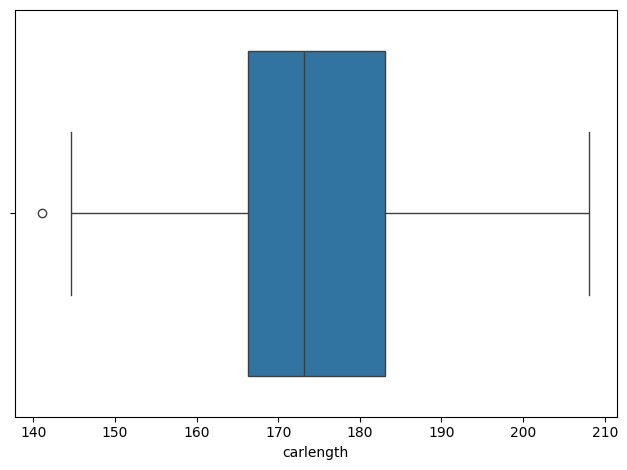

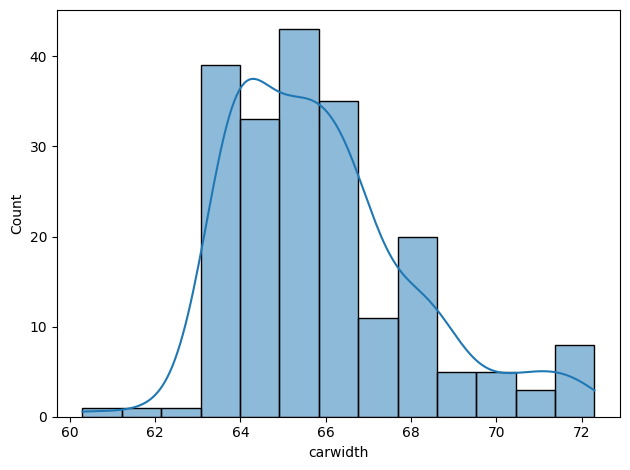

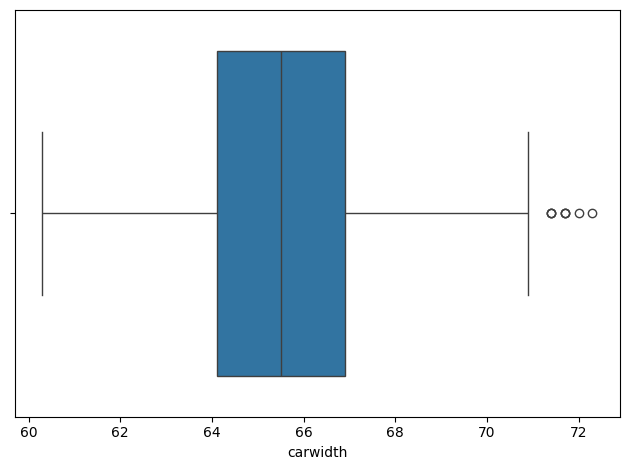

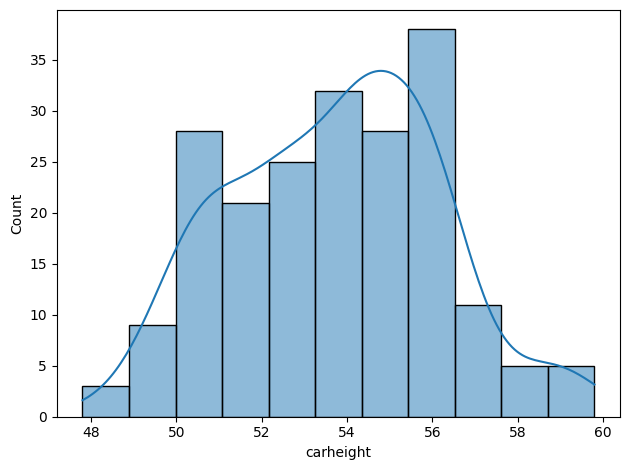

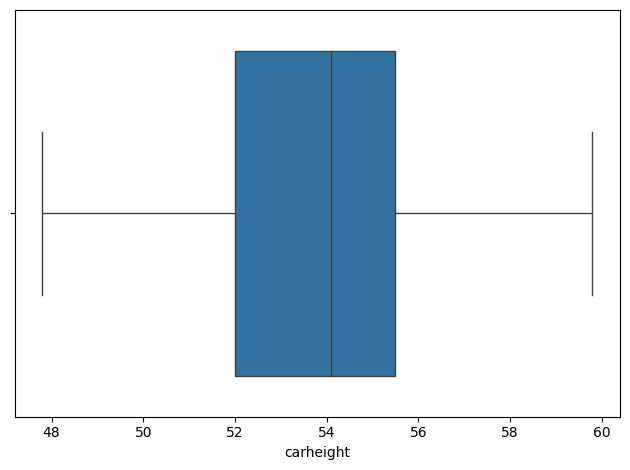

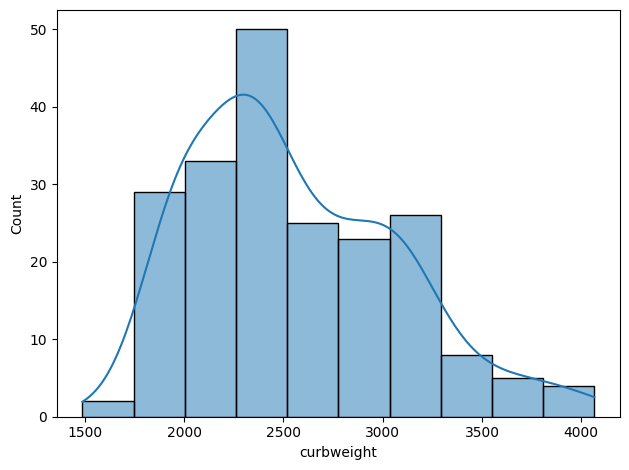

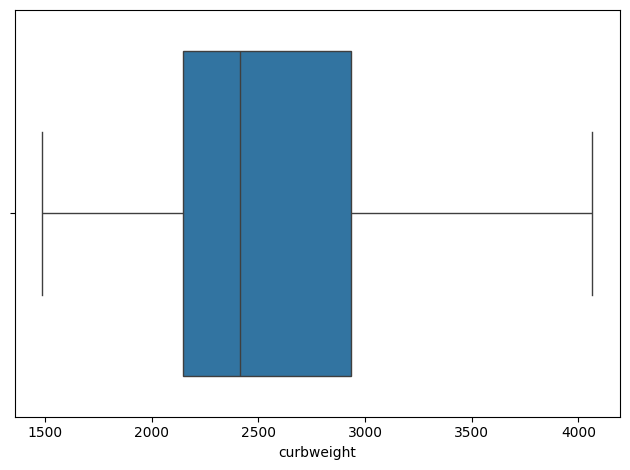

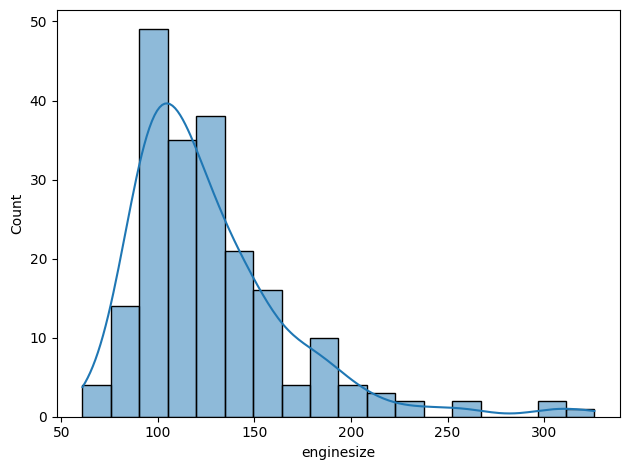

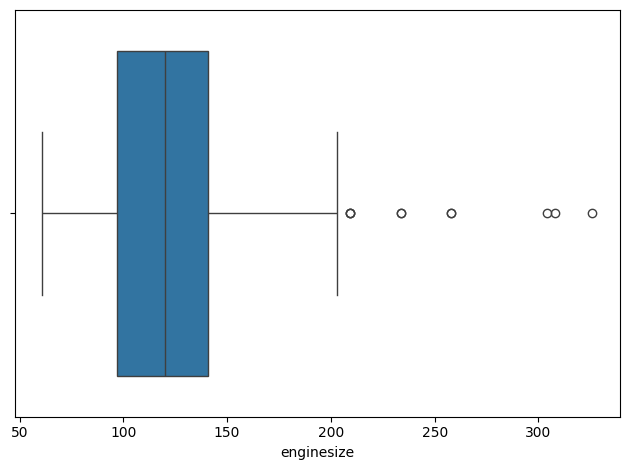

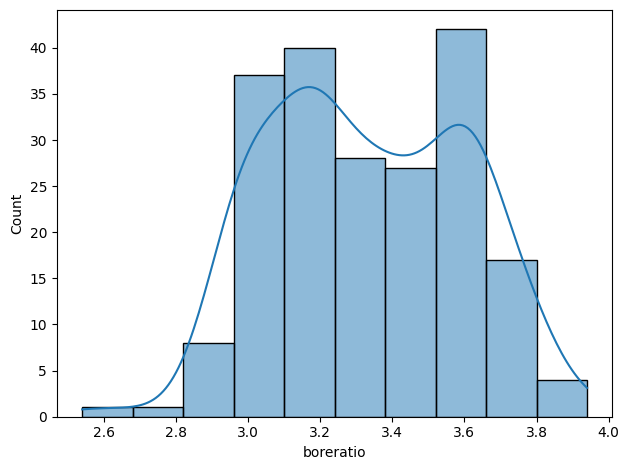

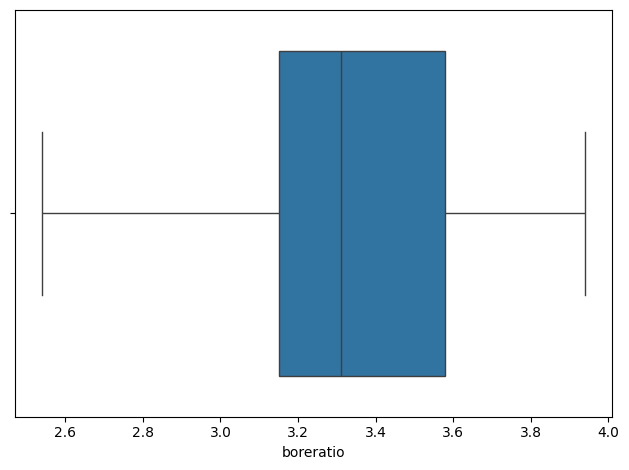

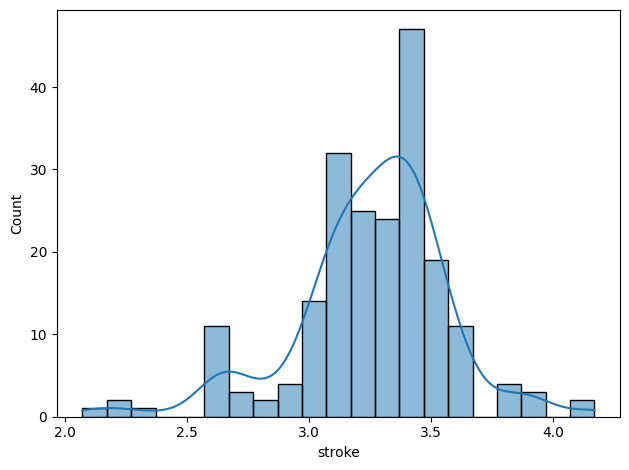

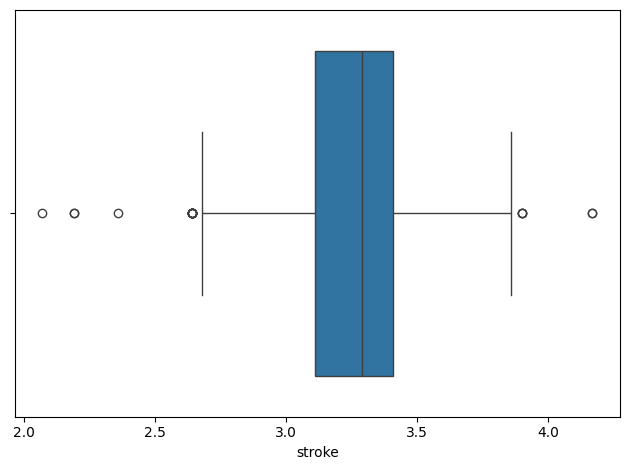

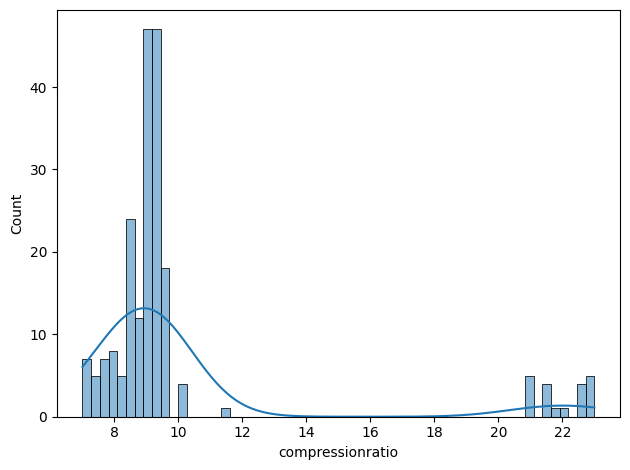

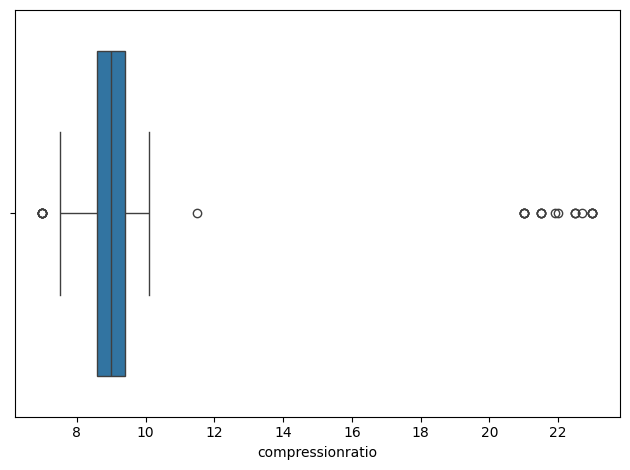

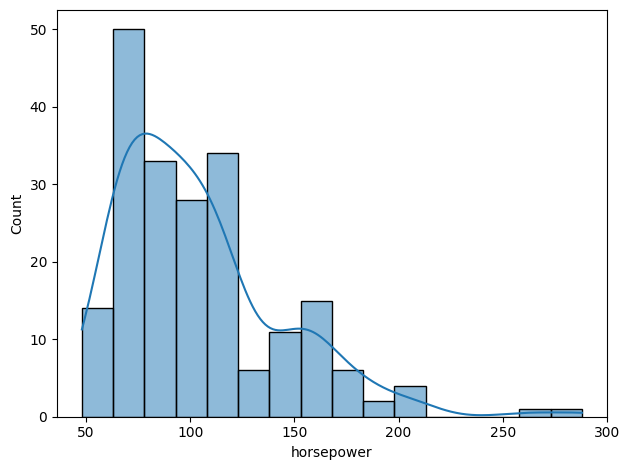

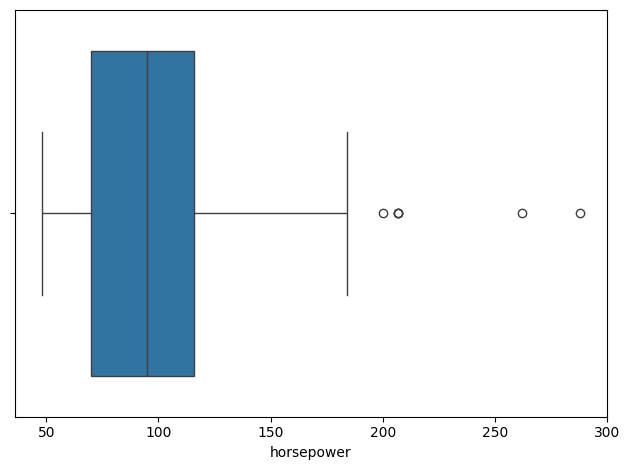

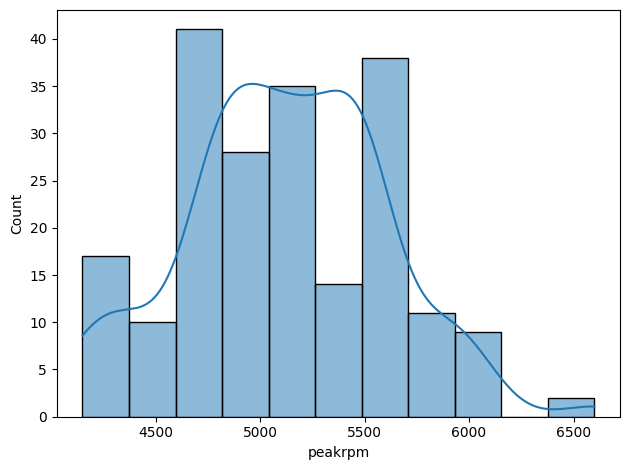

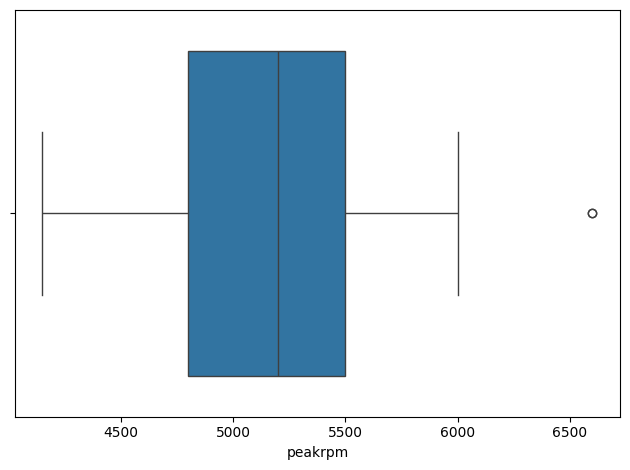

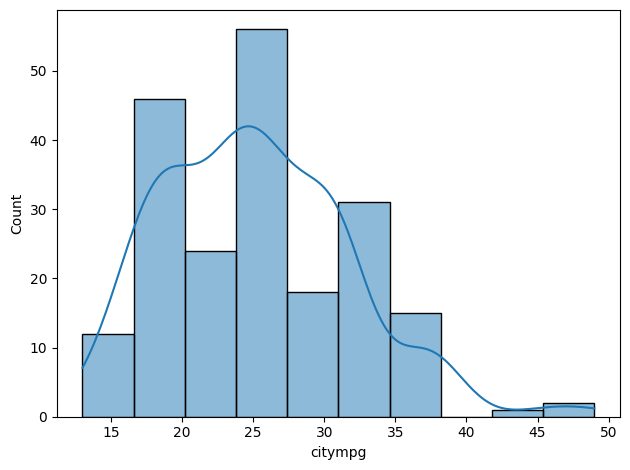

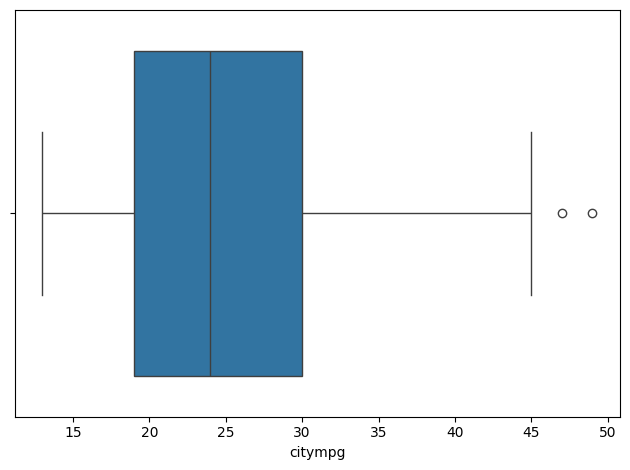

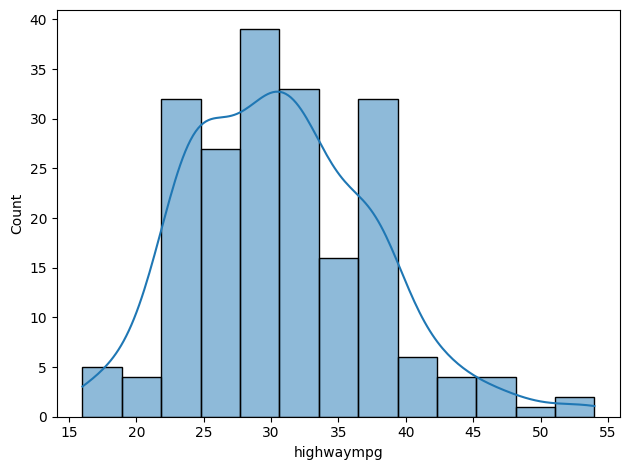

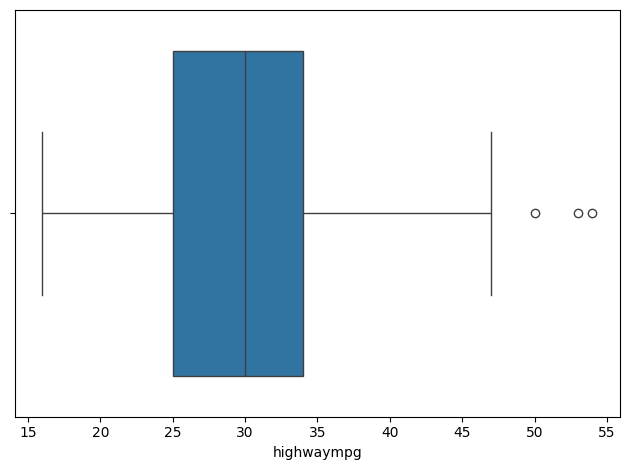

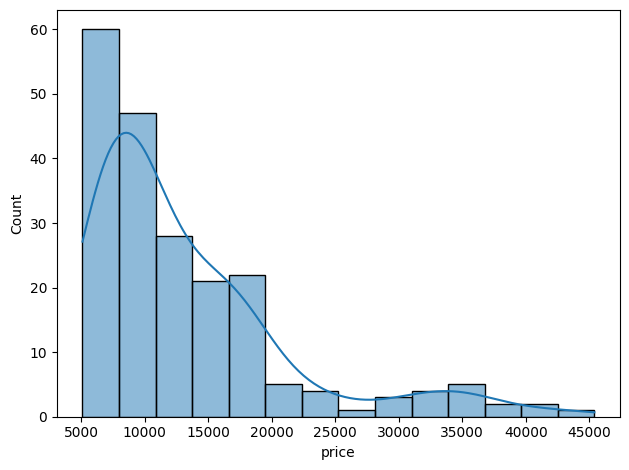

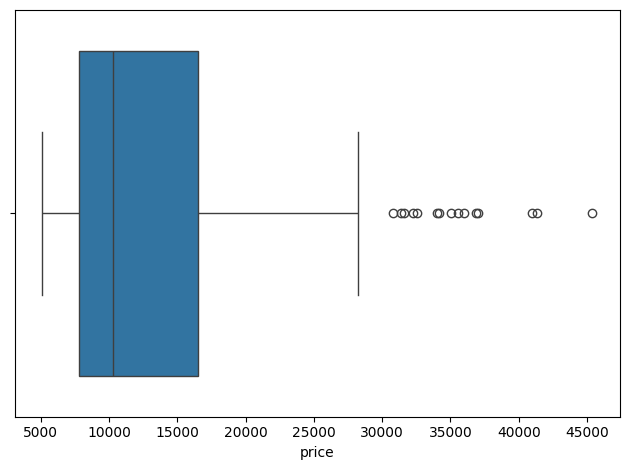

In [15]:
for column in numbers:
  sns.histplot(x=df[column],kde = True)
  plt.tight_layout()
  plt.show()
  print("")
  sns.boxplot(x=df[column])
  plt.tight_layout()
  plt.show()
  print("")

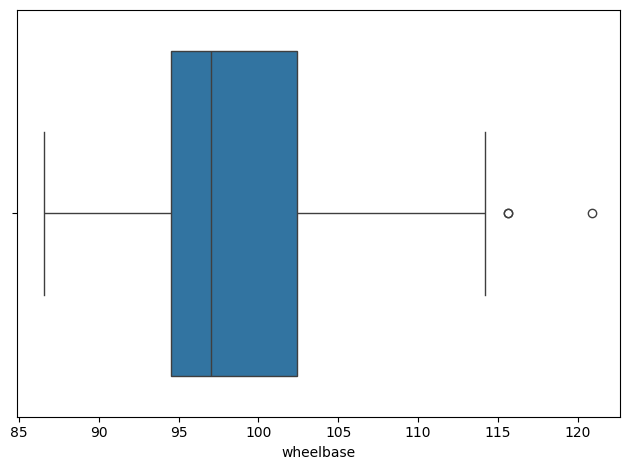

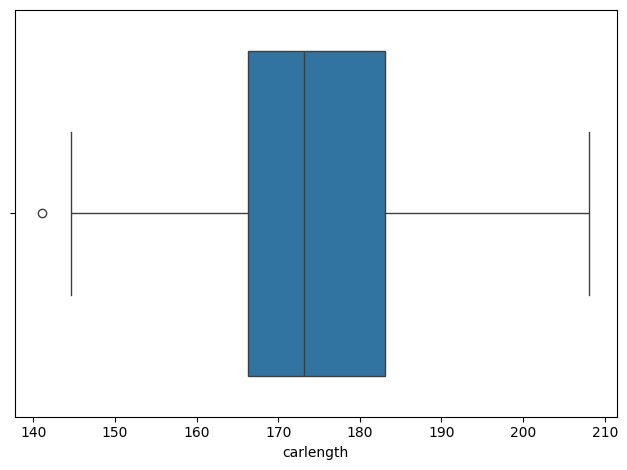

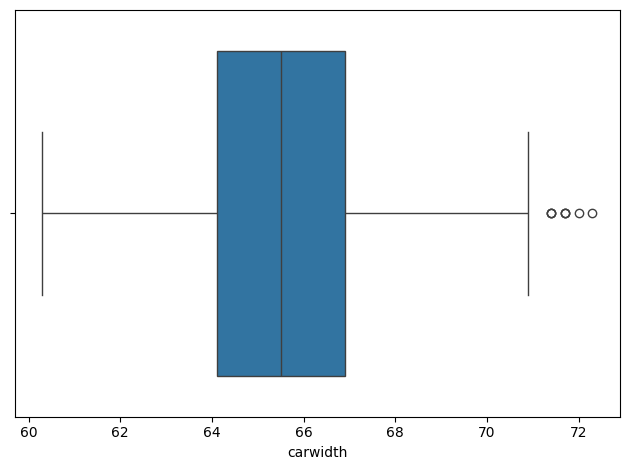

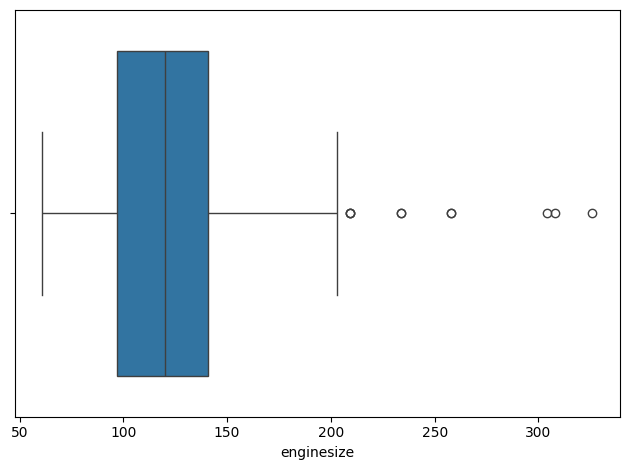

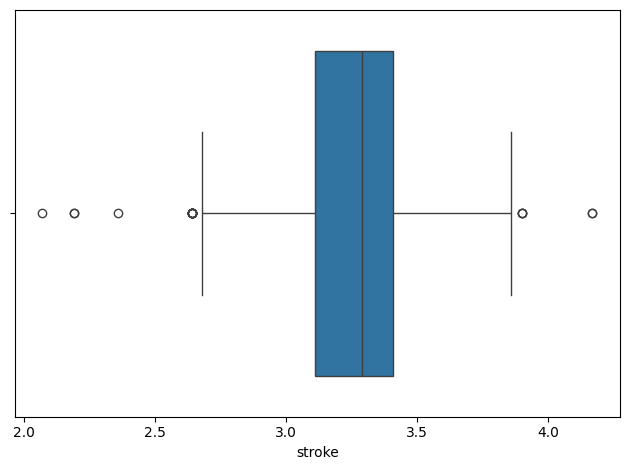

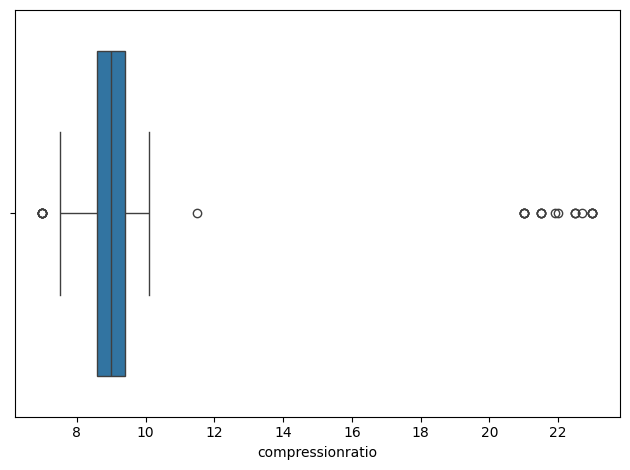

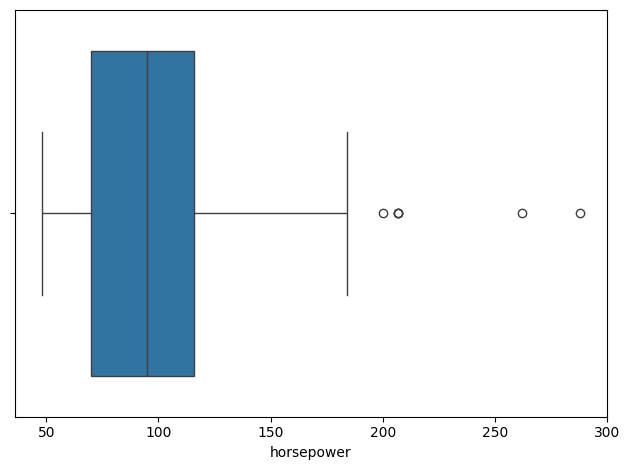

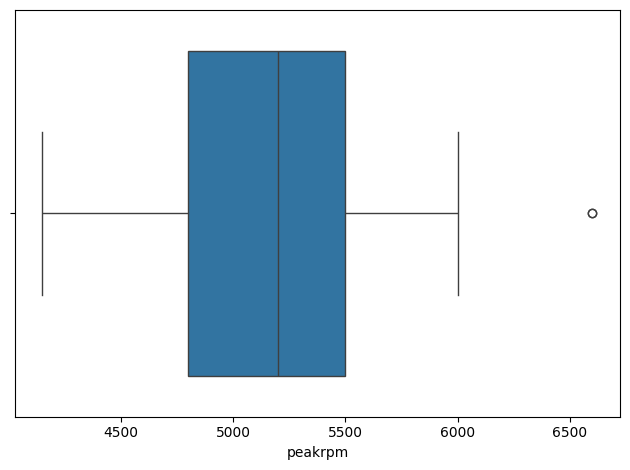

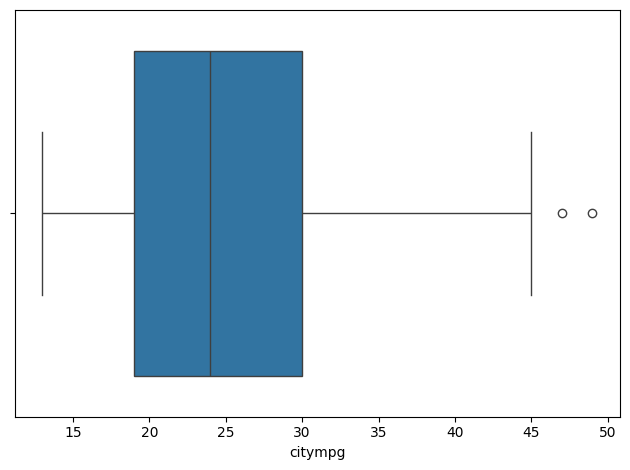

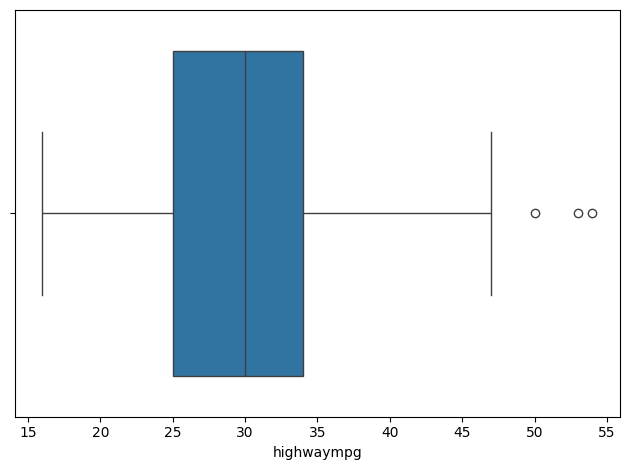

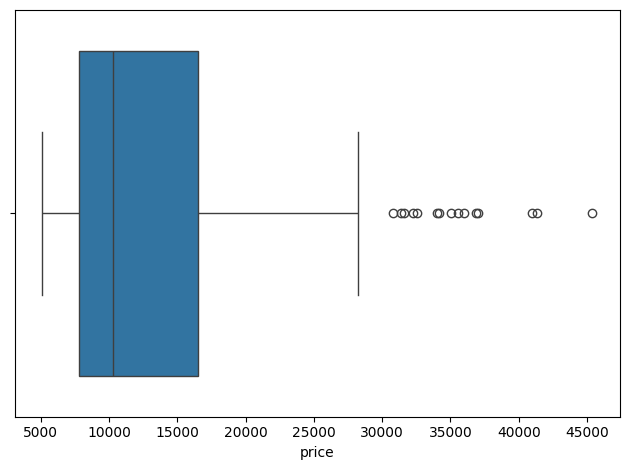

In [16]:
outlier_col = ["wheelbase","carlength","carwidth","enginesize","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]
for column in outlier_col:
  sns.boxplot(x=df[column])
  plt.tight_layout()
  plt.show()
  print("")

In [17]:
car_df = df.copy()
for column in outlier_col:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  low_bound =  Q1-1.5*IQR
  high_bound = Q3+1.5*IQR
  car_df[column] = np.where(car_df[column]>high_bound,high_bound,np.where(car_df[column]<low_bound,low_bound,car_df[column]))


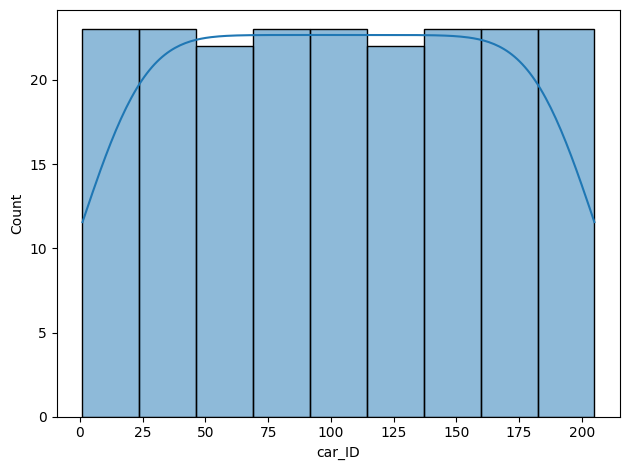

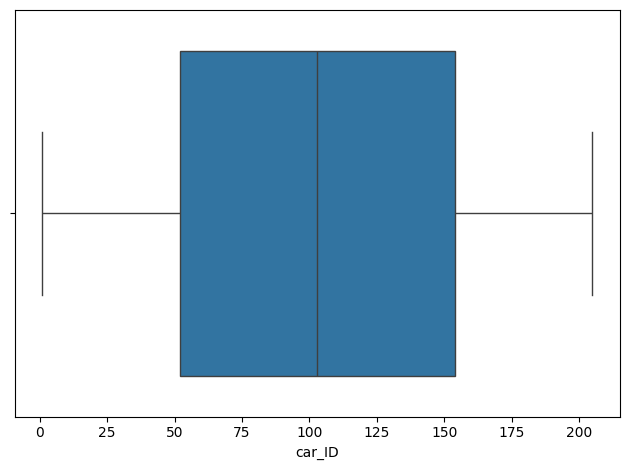

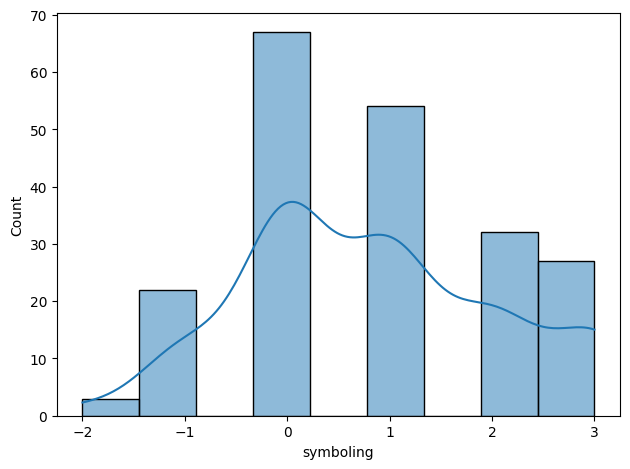

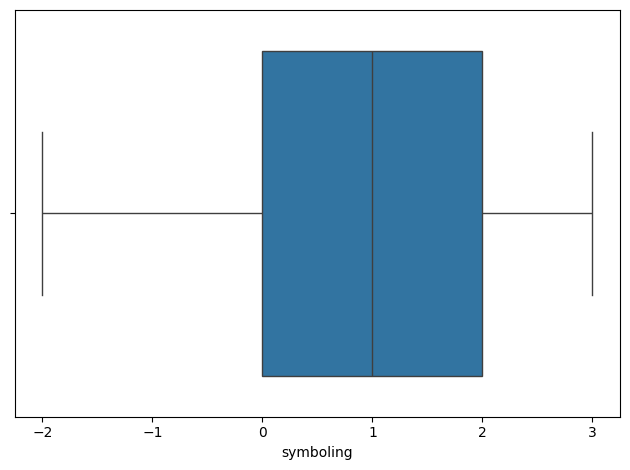

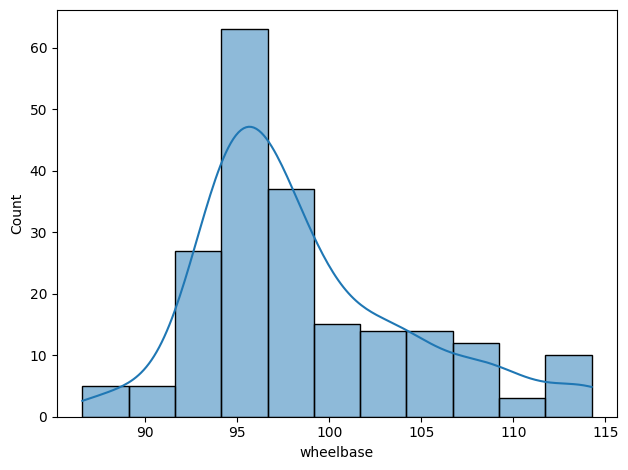

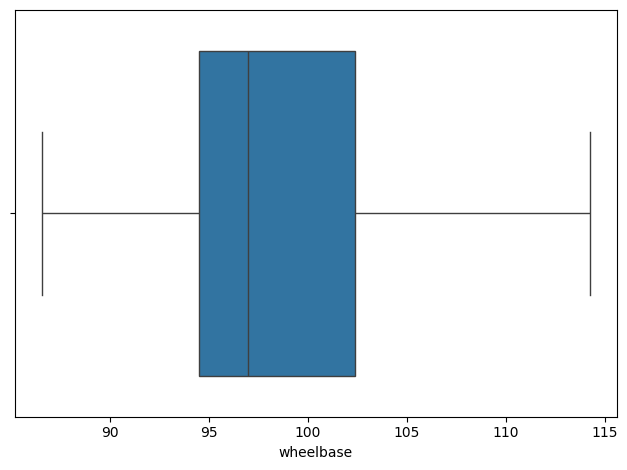

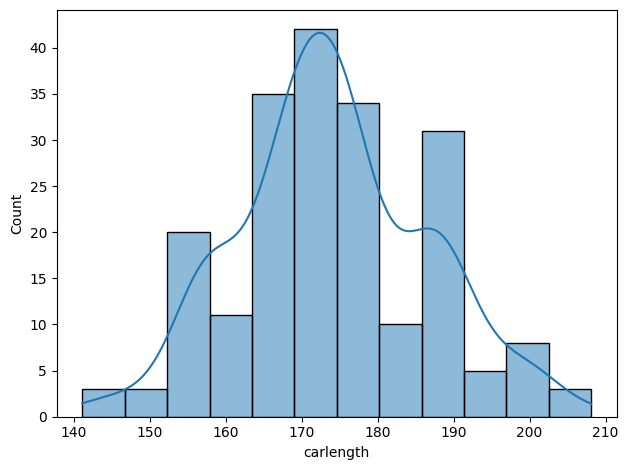

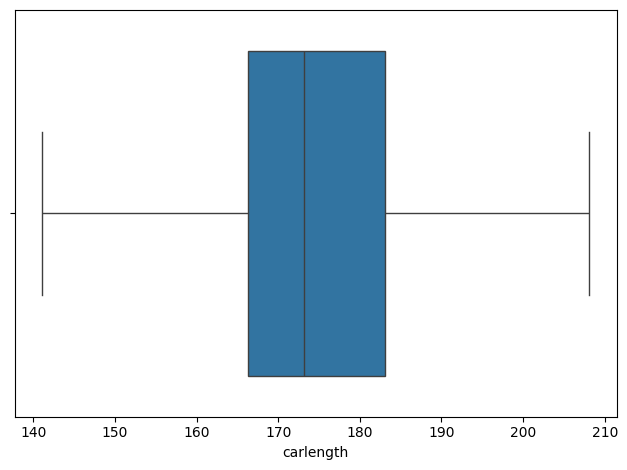

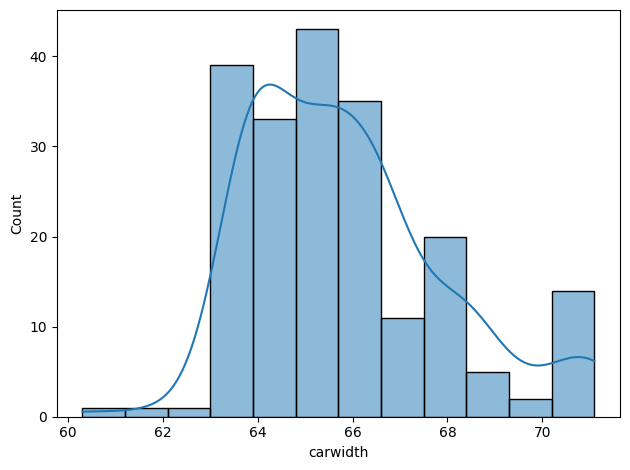

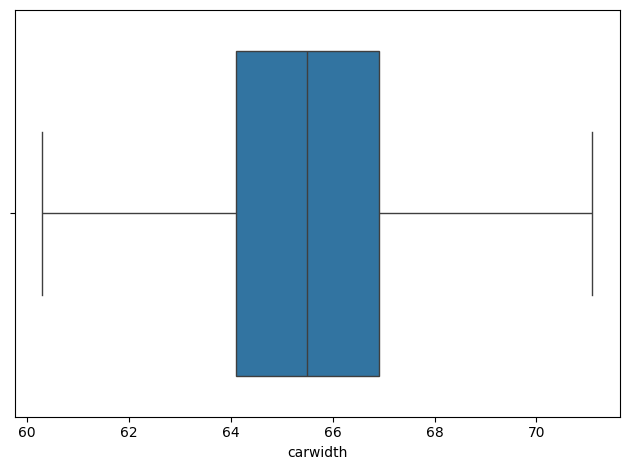

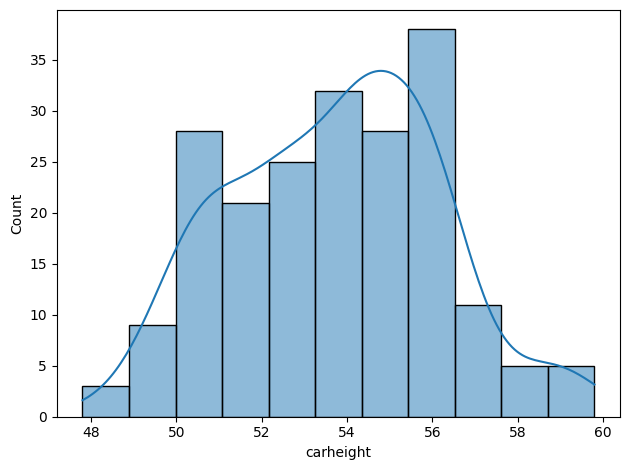

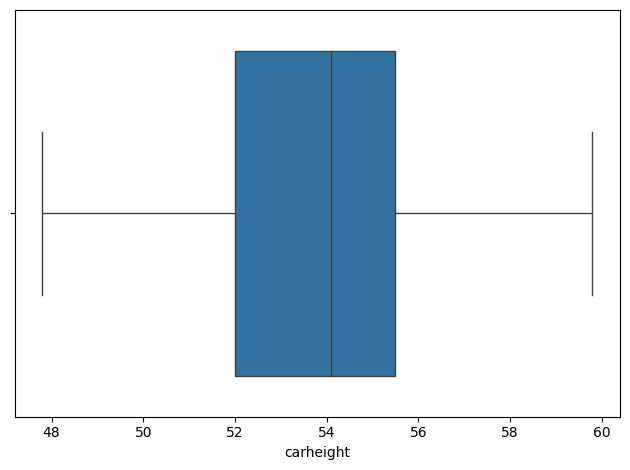

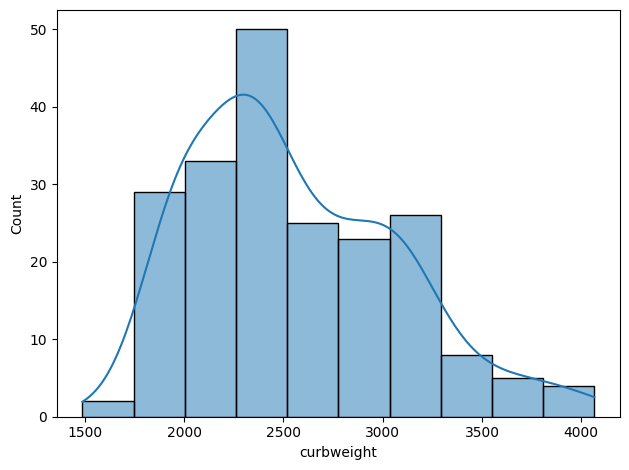

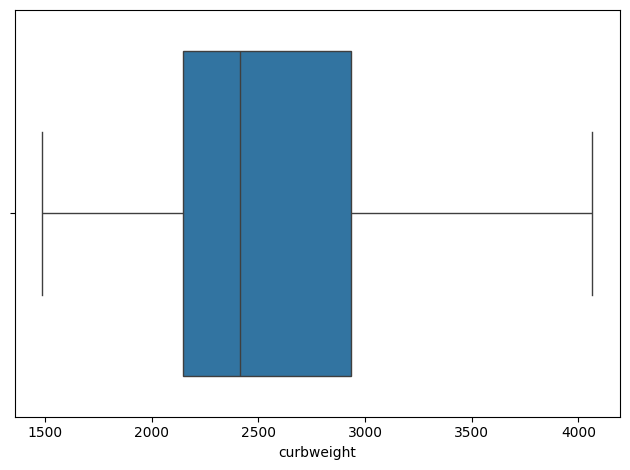

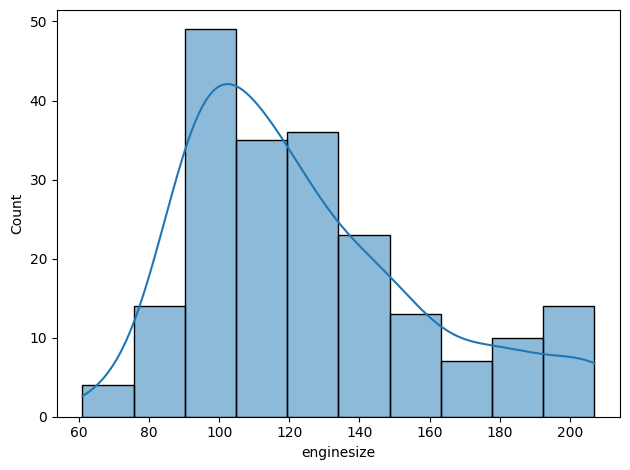

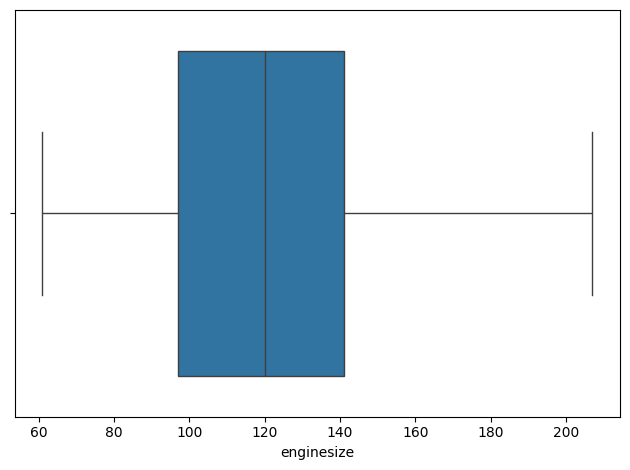

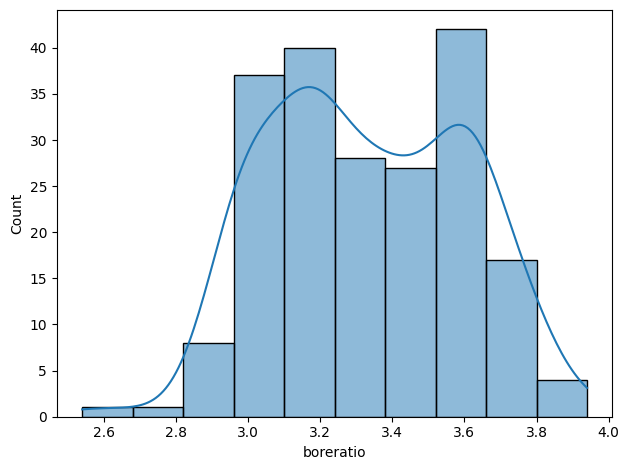

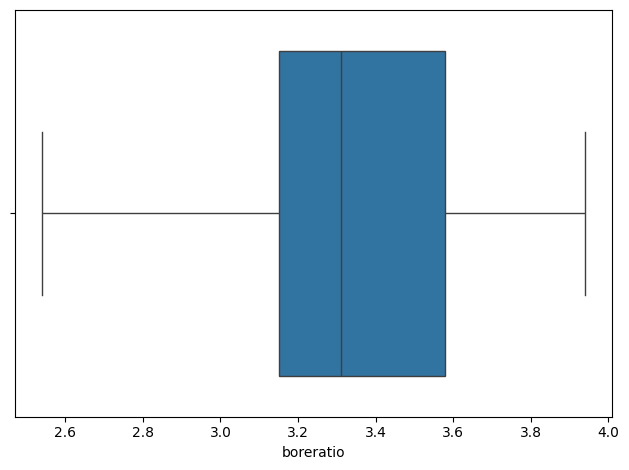

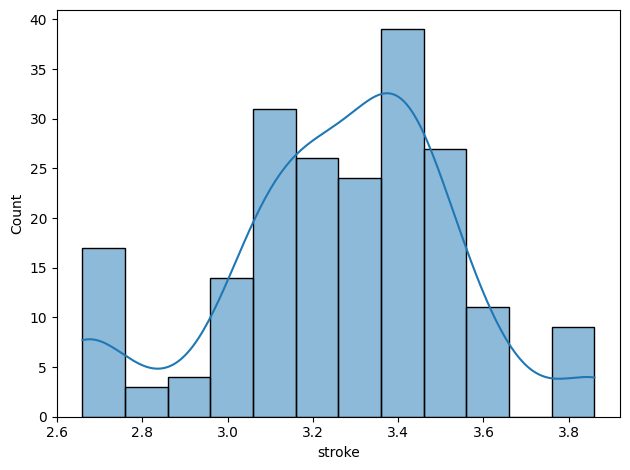

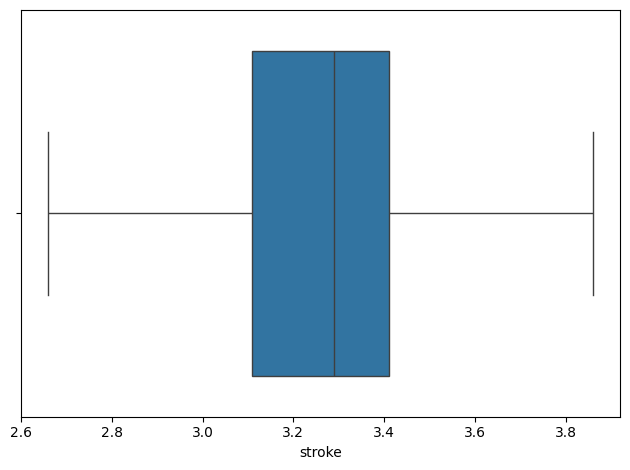

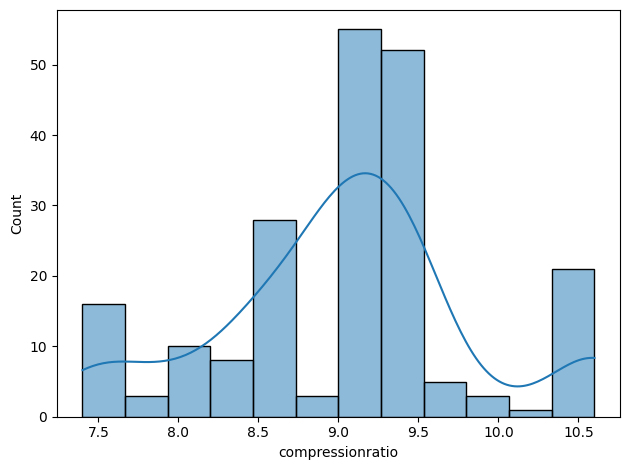

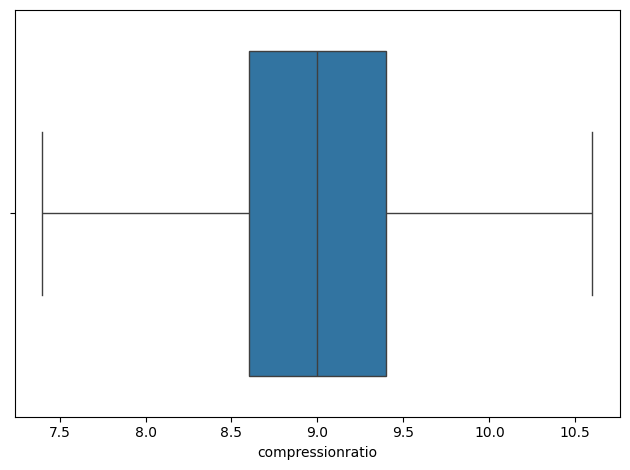

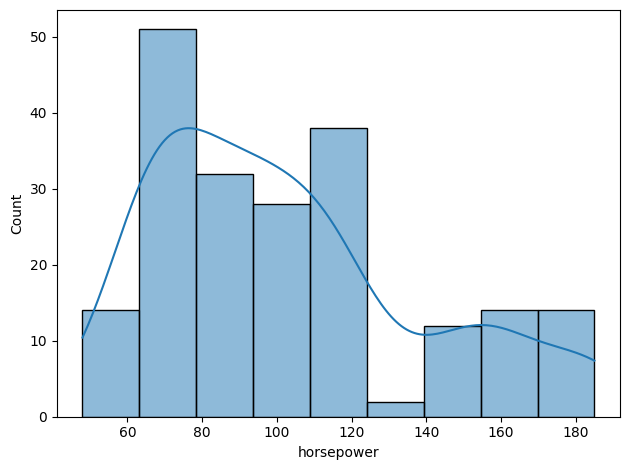

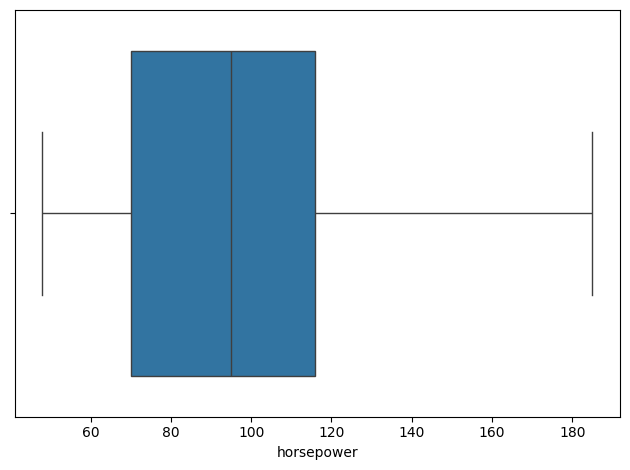

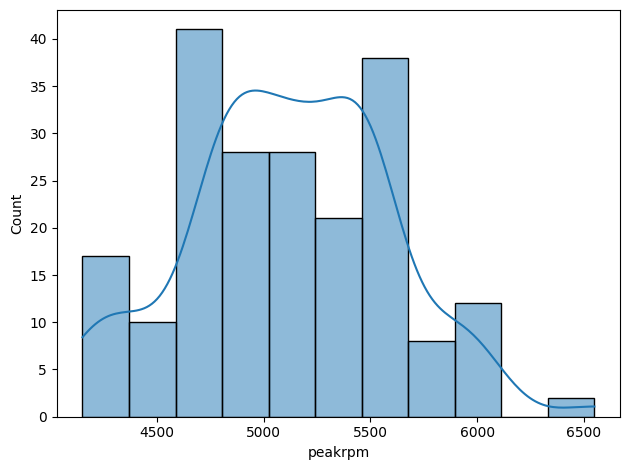

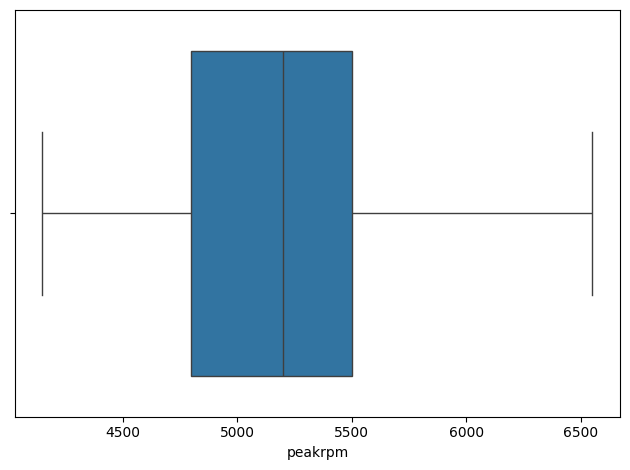

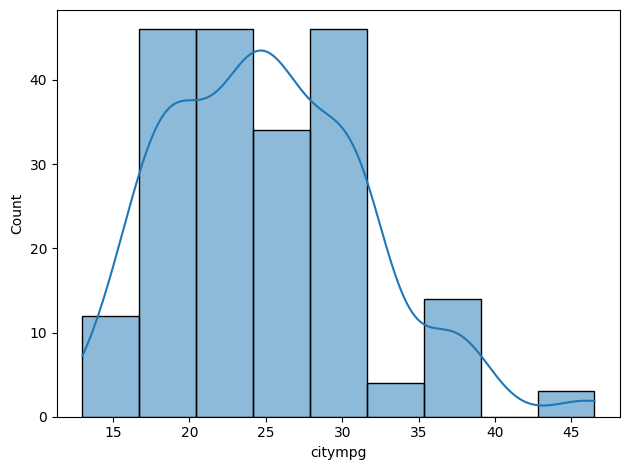

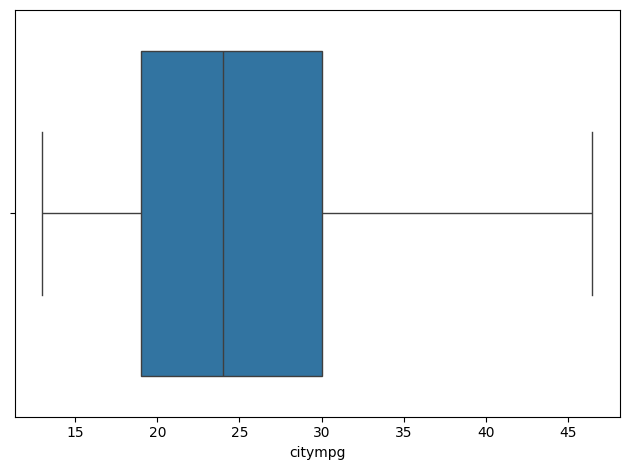

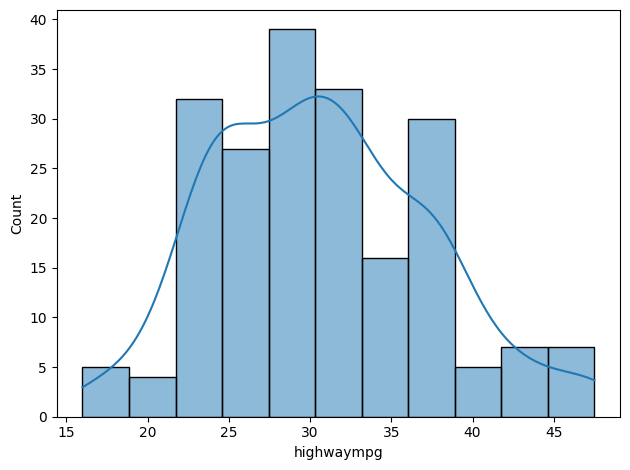

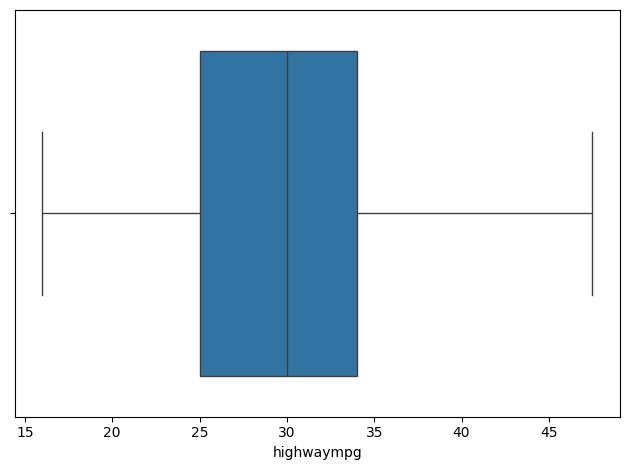

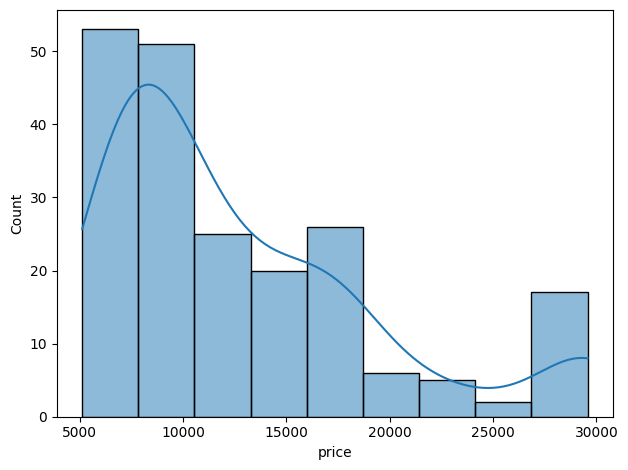

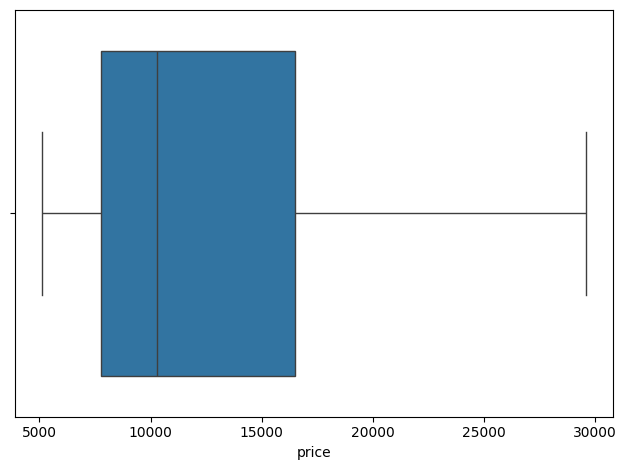

In [18]:
for column in numbers:
  sns.histplot(x=car_df[column],kde = True)
  plt.tight_layout()
  plt.show()
  print("")
  sns.boxplot(x=car_df[column])
  plt.tight_layout()
  plt.show()
  print("")

In [19]:
skewd = ["wheelbase","curbweight","enginesize","horsepower","citympg","highwaympg"] #transform the skewed column using logtransform
for column in skewd:
  car_df[column] = np.log1p(car_df[column])

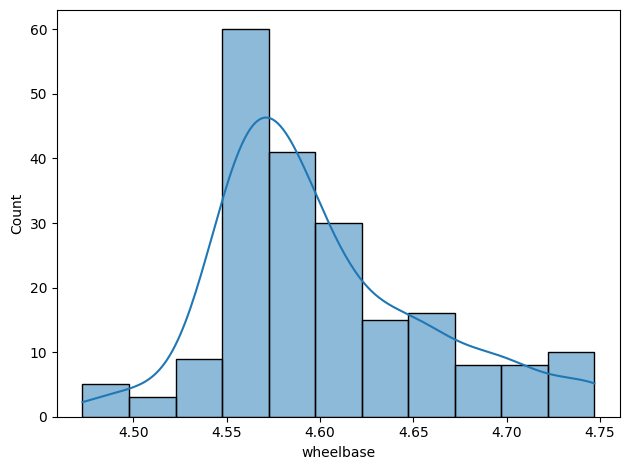

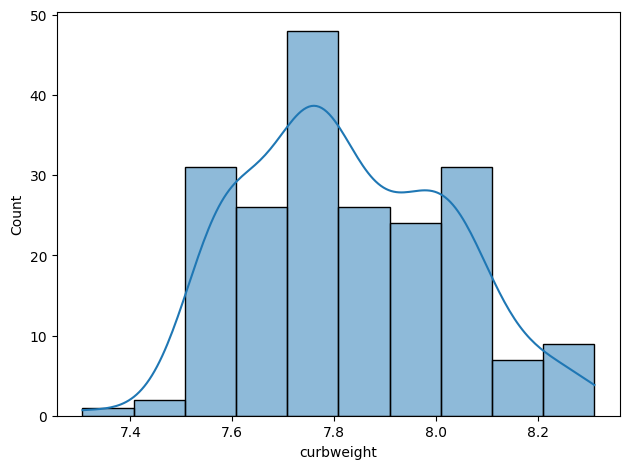

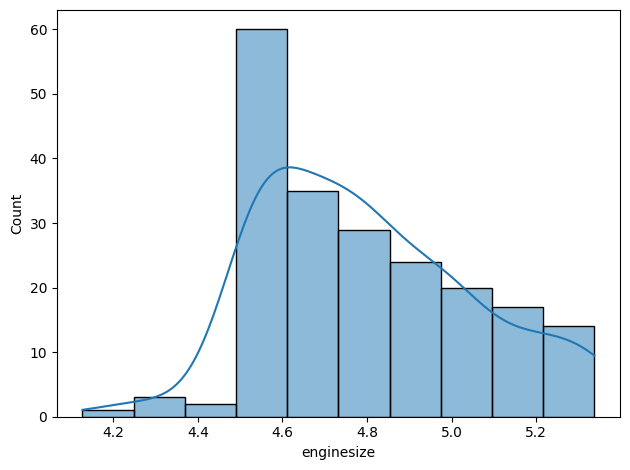

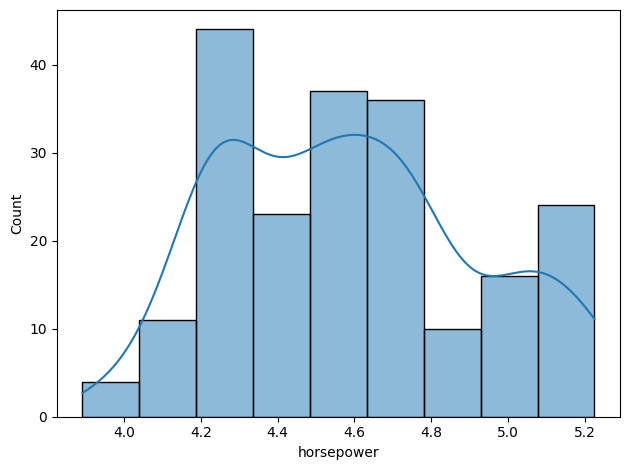

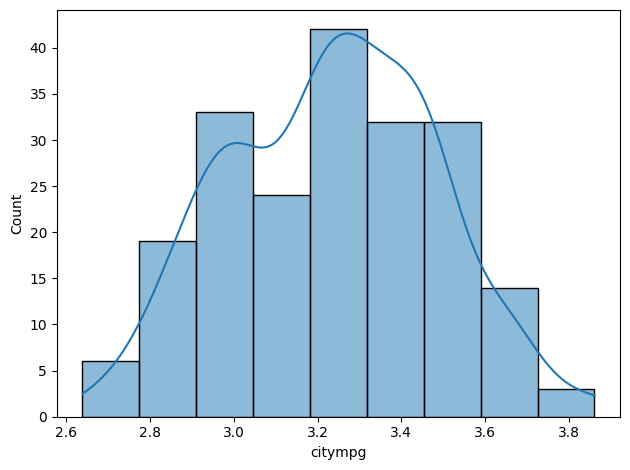

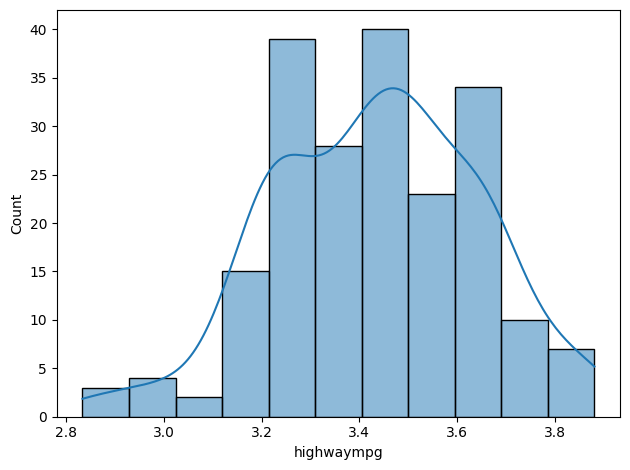

In [20]:
for column in skewd:
  sns.histplot(x=car_df[column],kde = True)
  plt.tight_layout()
  plt.show()
  print("")

In [21]:
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,4.495355,...,4.875197,mpfi,3.47,2.68,9.0,4.718499,5000.0,3.091042,3.332205,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,4.495355,...,4.875197,mpfi,3.47,2.68,9.0,4.718499,5000.0,3.091042,3.332205,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,4.559126,...,5.030438,mpfi,2.68,3.47,9.0,5.043425,5000.0,2.995732,3.295837,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,4.613138,...,4.700480,mpfi,3.19,3.40,10.0,4.634729,5500.0,3.218876,3.433987,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,4.609162,...,4.919981,mpfi,3.19,3.40,8.0,4.753590,5500.0,2.944439,3.135494,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,4.701389,...,4.955827,mpfi,3.78,3.15,9.5,4.744932,5400.0,3.178054,3.367296,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,4.701389,...,4.955827,mpfi,3.78,3.15,8.7,5.081404,5300.0,2.995732,3.258097,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,4.701389,...,5.159055,mpfi,3.58,2.87,8.8,4.905275,5500.0,2.944439,3.178054,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,4.701389,...,4.983607,idi,3.01,3.40,10.6,4.672829,4800.0,3.295837,3.332205,22470.0


#Feature import Analysis:

In [22]:
cor_mtrx = car_df[numbers].corr()
cor_mtrx

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.144835,0.170636,0.059244,0.255960,0.107791,0.049239,0.260064,-0.157469,0.158596,-0.010628,-0.205532,0.055889,0.049120,-0.089603
symboling,-0.151621,1.000000,-0.541827,-0.357612,-0.235697,-0.541038,-0.216353,-0.125142,-0.130051,0.006560,-0.070206,0.046923,0.274328,-0.054591,0.025833,-0.092705
wheelbase,0.144835,-0.541827,1.000000,0.876871,0.796666,0.597827,0.763193,0.572051,0.488799,0.190335,0.008641,0.433489,-0.359157,-0.472938,-0.555731,0.588969
carlength,0.170636,-0.357612,0.876871,1.000000,0.847860,0.491029,0.889073,0.729123,0.606454,0.150695,-0.063677,0.635588,-0.287697,-0.672278,-0.713315,0.712455
carwidth,0.059244,-0.235697,0.796666,0.847860,1.000000,0.283227,0.865153,0.745133,0.562591,0.206592,-0.040546,0.667492,-0.223673,-0.674015,-0.714020,0.783230
carheight,0.255960,-0.541038,0.597827,0.491029,0.283227,1.000000,0.301472,0.140517,0.171071,-0.026551,0.124448,-0.047391,-0.320942,-0.023090,-0.096151,0.142033
curbweight,0.107791,-0.216353,0.763193,0.889073,0.865153,0.301472,1.000000,0.866210,0.670262,0.170660,-0.115683,0.800213,-0.257307,-0.804326,-0.836681,0.849615
enginesize,0.049239,-0.125142,0.572051,0.729123,0.745133,0.140517,0.866210,1.000000,0.654157,0.232951,-0.129293,0.817111,-0.270632,-0.711033,-0.716835,0.828826
boreratio,0.260064,-0.130051,0.488799,0.606454,0.562591,0.171071,0.670262,0.654157,1.000000,-0.089477,-0.107986,0.608291,-0.255434,-0.578751,-0.577535,0.572685
stroke,-0.157469,0.006560,0.190335,0.150695,0.206592,-0.026551,0.170660,0.232951,-0.089477,1.000000,-0.047730,0.125258,-0.074739,-0.043998,-0.050415,0.073830


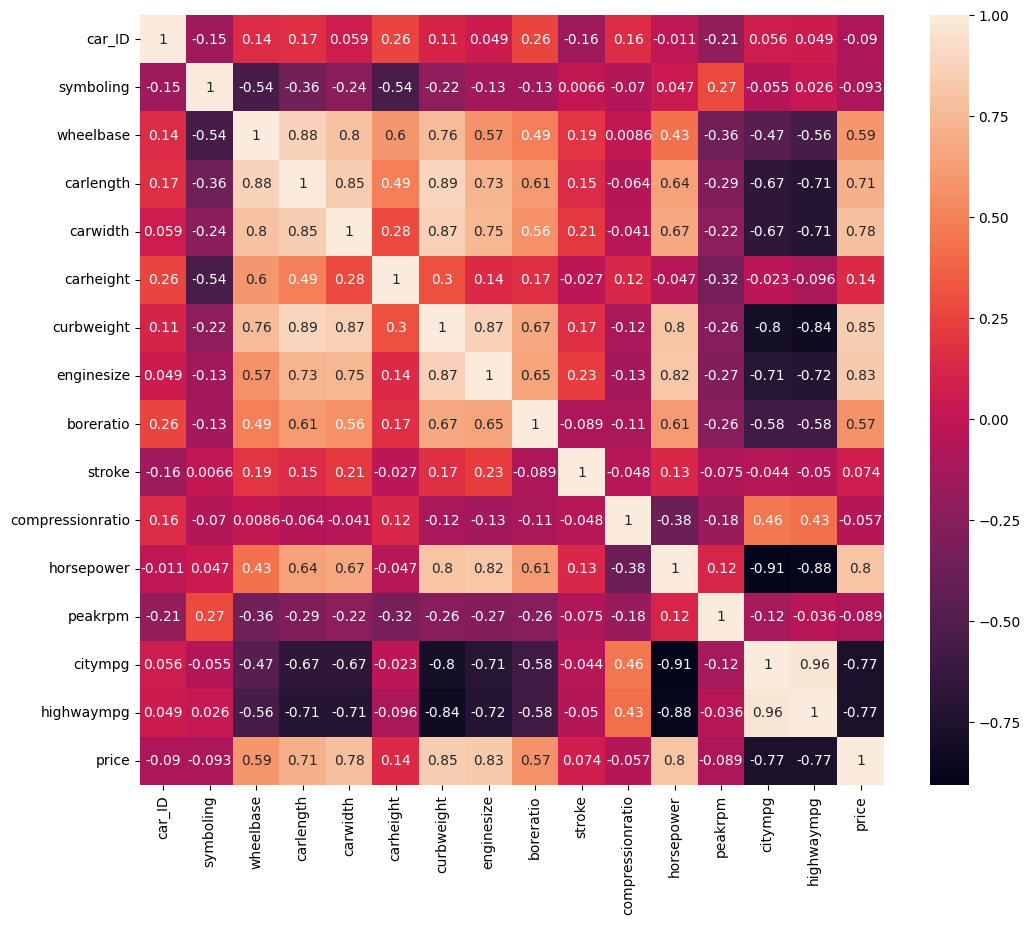

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(cor_mtrx,annot = True)
plt.show()

In [24]:
features = ['car_ID','symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

# Select the top 5 features based on F-statistic
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(car_df[features],car_df["price"])

# Display results
print("Selected Features Shape:", X_new.shape)
print("Feature Scores:", selector.scores_)

Selected Features Shape: (205, 5)
Feature Scores: [  1.64302717   1.75975173 107.81801743 209.25984197 322.15725212
   4.1795106  526.81035075 445.4648559   99.06904935   1.11260507
   0.65179859 369.676574     1.60725143 286.76464936 293.55453658]


In [25]:
X_new.shape

(205, 5)

In [26]:
# best 5 numerical features
car_df[features].columns[selector.get_support()]

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg'], dtype='object')

In [27]:
car_df[objects]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [28]:
car_df.drop(['car_ID','symboling','CarName'], axis=1, inplace=True)
car_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,4.495355,168.8,64.1,48.8,...,4.875197,mpfi,3.47,2.68,9.0,4.718499,5000.0,3.091042,3.332205,13495.0
1,gas,std,two,convertible,rwd,front,4.495355,168.8,64.1,48.8,...,4.875197,mpfi,3.47,2.68,9.0,4.718499,5000.0,3.091042,3.332205,16500.0
2,gas,std,two,hatchback,rwd,front,4.559126,171.2,65.5,52.4,...,5.030438,mpfi,2.68,3.47,9.0,5.043425,5000.0,2.995732,3.295837,16500.0
3,gas,std,four,sedan,fwd,front,4.613138,176.6,66.2,54.3,...,4.700480,mpfi,3.19,3.40,10.0,4.634729,5500.0,3.218876,3.433987,13950.0
4,gas,std,four,sedan,4wd,front,4.609162,176.6,66.4,54.3,...,4.919981,mpfi,3.19,3.40,8.0,4.753590,5500.0,2.944439,3.135494,17450.0


In [29]:
object_column_namelist = car_df.select_dtypes(include='object').columns.tolist() # make a list of columns with object data.
object_column_namelist

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [30]:
# One-hot encoding for categorical variables and make new encoded df
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(car_df[object_column_namelist])
encoded_object_column_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(object_column_namelist), index = car_df.index)
encoded_object_column_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fueltype_diesel        205 non-null    float64
 1   fueltype_gas           205 non-null    float64
 2   aspiration_std         205 non-null    float64
 3   aspiration_turbo       205 non-null    float64
 4   doornumber_four        205 non-null    float64
 5   doornumber_two         205 non-null    float64
 6   carbody_convertible    205 non-null    float64
 7   carbody_hardtop        205 non-null    float64
 8   carbody_hatchback      205 non-null    float64
 9   carbody_sedan          205 non-null    float64
 10  carbody_wagon          205 non-null    float64
 11  drivewheel_4wd         205 non-null    float64
 12  drivewheel_fwd         205 non-null    float64
 13  drivewheel_rwd         205 non-null    float64
 14  enginelocation_front   205 non-null    float64
 15  engine

In [31]:
encoded_object_column_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
# get encoded column name list
encoded_object_column_names = encoded_object_column_df.columns.tolist()
print(encoded_object_column_names)

['fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four', 'doornumber_two', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']


In [33]:
selector = SelectKBest(score_func=f_regression, k=10)
object_new = selector.fit_transform(encoded_object_column_df[encoded_object_column_names],car_df["price"])

In [34]:
# best 10 object features after encoding
encoded_object_column_df[encoded_object_column_names].columns[selector.get_support()]

Index(['drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_mpfi'],
      dtype='object')

In [35]:
#selecteed 5 numerical columns
num_column_list = ['carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg']
car_df_numerical=car_df[num_column_list]
car_df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carwidth    205 non-null    float64
 1   curbweight  205 non-null    float64
 2   enginesize  205 non-null    float64
 3   horsepower  205 non-null    float64
 4   highwaympg  205 non-null    float64
dtypes: float64(5)
memory usage: 8.1 KB


#scale

In [36]:
# selected 10 object columns (encoded df)
encoded_object_column_df

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
# selected features applied transforms and onehot encoding
selected_features = pd.concat([car_df_numerical, encoded_object_column_df], axis=1)
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   carwidth               205 non-null    float64
 1   curbweight             205 non-null    float64
 2   enginesize             205 non-null    float64
 3   horsepower             205 non-null    float64
 4   highwaympg             205 non-null    float64
 5   fueltype_diesel        205 non-null    float64
 6   fueltype_gas           205 non-null    float64
 7   aspiration_std         205 non-null    float64
 8   aspiration_turbo       205 non-null    float64
 9   doornumber_four        205 non-null    float64
 10  doornumber_two         205 non-null    float64
 11  carbody_convertible    205 non-null    float64
 12  carbody_hardtop        205 non-null    float64
 13  carbody_hatchback      205 non-null    float64
 14  carbody_sedan          205 non-null    float64
 15  carbod

In [38]:
selected_features

,carwidth,curbweight,enginesize,horsepower,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,64.1,7.843456,4.875197,4.718499,3.332205,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,64.1,7.843456,4.875197,4.718499,3.332205,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,65.5,7.945910,5.030438,5.043425,3.295837,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,66.2,7.757051,4.700480,4.634729,3.433987,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,66.4,7.946264,4.919981,4.753590,3.135494,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,68.9,7.990577,4.955827,4.744932,3.367296,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,68.8,8.022897,4.955827,5.081404,3.258097,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,68.9,8.010692,5.159055,4.905275,3.178054,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,68.9,8.076515,4.983607,4.672829,3.332205,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
print(num_column_list)

['carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg']


In [40]:
#scaling values in ['carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg'] columns
scaler = StandardScaler()
columns_to_scale = ['carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg']
selected_features[columns_to_scale] = scaler.fit_transform(selected_features[columns_to_scale])
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   carwidth               205 non-null    float64
 1   curbweight             205 non-null    float64
 2   enginesize             205 non-null    float64
 3   horsepower             205 non-null    float64
 4   highwaympg             205 non-null    float64
 5   fueltype_diesel        205 non-null    float64
 6   fueltype_gas           205 non-null    float64
 7   aspiration_std         205 non-null    float64
 8   aspiration_turbo       205 non-null    float64
 9   doornumber_four        205 non-null    float64
 10  doornumber_two         205 non-null    float64
 11  carbody_convertible    205 non-null    float64
 12  carbody_hardtop        205 non-null    float64
 13  carbody_hatchback      205 non-null    float64
 14  carbody_sedan          205 non-null    float64
 15  carbod

In [41]:
final_df = selected_features
final_df

,carwidth,curbweight,enginesize,horsepower,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-0.858695,0.085230,0.297426,0.398577,-0.474602,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.858695,0.085230,0.297426,0.398577,-0.474602,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.184978,0.604253,0.905047,1.392392,-0.645287,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.151880,-0.352496,-0.386427,0.142359,0.003099,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.248125,0.606047,0.472712,0.505907,-1.397829,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.451189,0.830536,0.613016,0.479425,-0.309906,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,1.403066,0.994268,0.613016,1.508555,-0.822415,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,1.451189,0.932436,1.408464,0.969847,-1.198083,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,1.451189,1.265897,0.721747,0.258891,-0.474602,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


 # Model Implementation

In [42]:
x = final_df
y = car_df['price']

In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   carwidth               205 non-null    float64
 1   curbweight             205 non-null    float64
 2   enginesize             205 non-null    float64
 3   horsepower             205 non-null    float64
 4   highwaympg             205 non-null    float64
 5   fueltype_diesel        205 non-null    float64
 6   fueltype_gas           205 non-null    float64
 7   aspiration_std         205 non-null    float64
 8   aspiration_turbo       205 non-null    float64
 9   doornumber_four        205 non-null    float64
 10  doornumber_two         205 non-null    float64
 11  carbody_convertible    205 non-null    float64
 12  carbody_hardtop        205 non-null    float64
 13  carbody_hatchback      205 non-null    float64
 14  carbody_sedan          205 non-null    float64
 15  carbod

In [44]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: price
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [45]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

##### Train models

In [46]:
# make a dict of models to train
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# train each model
for name, model in models.items():
    model.fit(x_train, y_train)

# Model Evaluation

In [47]:
for name, model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} :   MSE:{mse}      MAE:{mae}      R2:{r2}')
    print('.'*150)

Linear Regression :   MSE:3321877.1060274127      MAE:1399.1729443504753      R2:0.9014879148691177
......................................................................................................................................................
Decision Tree Regressor :   MSE:5581583.182926829      MAE:1804.0243902439024      R2:0.8344750934091144
......................................................................................................................................................
Random Forest Regressor :   MSE:3564332.605278865      MAE:1493.7557318699187      R2:0.894297764234294
......................................................................................................................................................
Gradient Boosting Regressor :   MSE:3695508.832902838      MAE:1487.5567864360264      R2:0.8904076613525848
.................................................................................................................................

# Hyperparameter Tuning

In [48]:
# define hyperparameter grids for each model
param_grids = {
        'Linear Regression': {},   # no param for 'Linear Regression'
        'Decision Tree Regressor':
         {
            'max_depth': [None, 10, 20],   # The maximum depth of the tree (None means no limit).
            'min_samples_split': [2, 5, 10] # Minimum number of samples required to split a node.
         },

        'Random Forest Regressor':
         {
            'n_estimators': [100, 200, 300], # Number of trees in the forest.
            'max_depth': [None, 10, 20],     # Maximum depth of each tree (None means no limit).
            'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node.
         },
        'Gradient Boosting Regressor':
         {
            'n_estimators': [100, 200, 300],    # Number of boosting stages (trees).
            'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage (controls contribution of each tree).
            'max_depth': [3, 5, 7]               # Maximum depth of individual trees.
         },
        'Support Vector Regressor':
         {
            'C': [0.1, 1, 10, 100],  # Regularization parameter, larger values reduce regularization.
            'kernel': ['linear', 'rbf', 'poly'],  # Types of kernels (linear, radial basis, polynomial).
            'epsilon': [0.01, 0.1, 0.5]  # Width of the epsilon tube for margin of tolerance.
        }
 }

In [49]:
tuned_models = {}  # Store the tuned models
for name, model in models.items():
    param_grid = param_grids[name]
    gscv = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_squared_error',cv=5, n_jobs=-1 )
    gscv.fit(x_train, y_train)
    tuned_models[name] = gscv.best_estimator_  # Store the best estimator (model) from the grid search

# Model Evaluation After Hyperparameter Tuning

In [50]:
# evaluate each tuned model
for name, model in tuned_models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} :   MSE:{mse}      MAE:{mae}     R2:{r2}')
    print('.'*150)

Linear Regression :   MSE:3321877.1060274127      MAE:1399.1729443504753     R2:0.9014879148691177
......................................................................................................................................................
Decision Tree Regressor :   MSE:5604586.200542006      MAE:1804.9756097560976     R2:0.8337929263218788
......................................................................................................................................................
Random Forest Regressor :   MSE:3577503.409840835      MAE:1485.5460023127089     R2:0.8939071768107265
......................................................................................................................................................
Gradient Boosting Regressor :   MSE:3802356.7157158684      MAE:1504.3754665238996     R2:0.8872390288620471
...................................................................................................................................

# Before and after Hyperparameter Tuning

#### Before

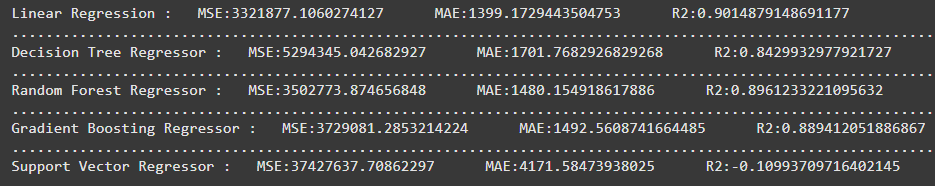

#### After

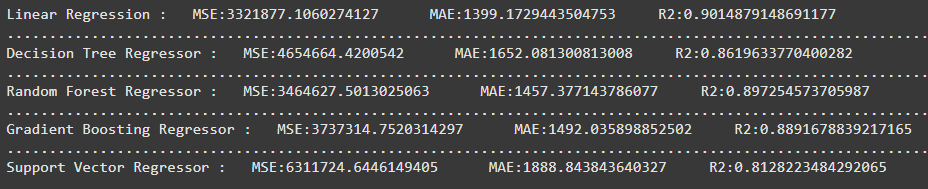

####Conclusion

* Hyperparameter tuning had the most significant impact on the Support Vector Regressor, dramatically improving its performance (R² went from -0.11 to 0.8128).
* Decision Tree also saw noticeable improvement across all metrics.
Random Forest and Gradient Boosting showed smaller but consistent improvements.
Linear Regression:
This model appears unaffected as no hyperparameters were tuned for it.
* Best Model:
After tuning, Linear Regression still holds the best R² (0.9015) and lowest MAE (1399.17), closely followed by Random Forest Regressor.